In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

# stratify 옵션을 넣어주는 이유는,
# 목표변수의 비율이 50:50이 아니라 한쪽으로 치우쳐있는 데이터를 학습하기 때문에 층화추출 샘플링을 진행하기 위함에 있다.



# tree = DecisionTreeClassifier(random_state = 0)
# tree.fit(X_train, y_train)

# print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
# print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))



# sklearn은 Decision tree 에서 사전/사후 가지치기를 지원

tree = DecisionTreeClassifier(random_state = 0, max_depth = 4)
tree.fit(X_train, y_train)

tree  # 옵션 확인 가능

print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))





from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', class_names = ['악성', '양성'],
               feature_names = cancer.feature_names, impurity = False, filled = True)

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


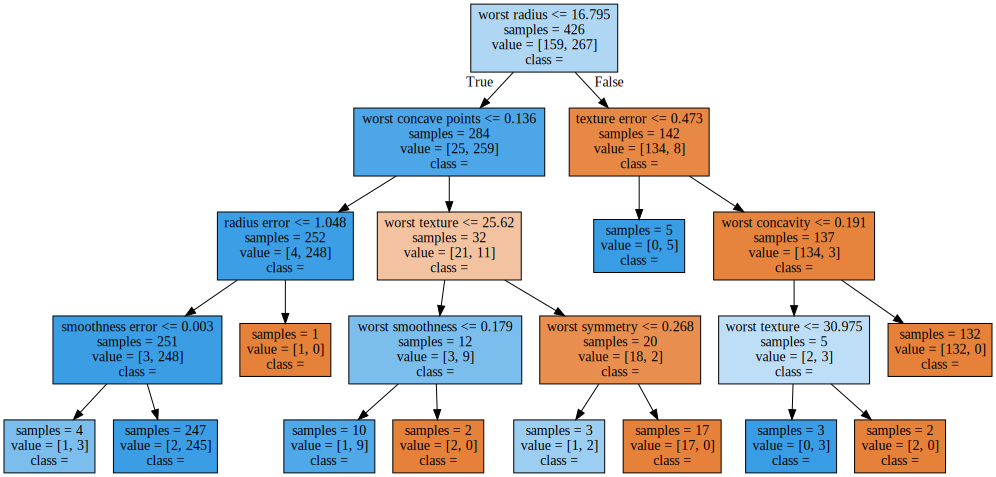

In [2]:
import graphviz

with open('tree.dot', encoding = 'utf-8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

# 아나콘다 콘솔창에서 graphviz 설치할 것

In [3]:
# 변수 특성 중요도 파악

tree.feature_importances_

# 시각화

import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 mi

Text(0, 0.5, '가격 ($/Mbyte)')

C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 45380 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44201 mis

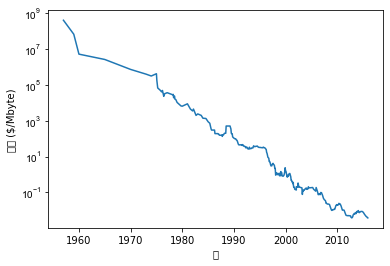

In [4]:
import os
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

ram_prices = pd.read_csv("introduction_to_ml_with_python-master/data/ram_price.csv")

plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)   # y축 log 변환
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)